## Imports

In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#from datetime import timedelta
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import base as skBase
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import  KNeighborsClassifier


from imblearn.combine import SMOTEENN


## Functions

#### Summary function, showing Missing Values, Nunique and Count of dataset

In [2]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['DTypes'])
    summary_df['Nunique'] = df.nunique()
    summary_df['MissingValues'] = df.isnull().sum()
    summary_df['Count'] = df.count()
    
    print(summary_df)

#### Plot correlation heatmap of features from a dataset

In [3]:
def heatmap(df,title):
    
    fig, axes = plt.subplots(figsize=(15, 15))
    corr = df.corr()            # Calculate correlation of param

    mask = np.zeros_like(corr)   # Create a array of zeros with the same shape as the df provided
    # print(mask)

    mask[np.triu_indices_from(mask)] = True    # set the index of the upper triangle of the array to True (1)
    # print(mask)

    with sns.axes_style("white"):
        sns.heatmap(corr, linewidths=1, 
                    annot=True, 
                    mask=mask, 
                    vmax=.3, 
                    square=True,
                   fmt=".2f",
                   cbar=True)  # mask: data will not be
        plt.suptitle(title, size="30")
        fig.savefig("imagens/Correlation_heatmap.png")
        

#### Plot confusion matrix

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### Show Scores functions
1. Call plot_confusion_matrix
2. Plot Roc Curve
3. Print precision, recall, F1Score, Accuracy and AUC Score

In [5]:
def showScores(y_test, y_score, best_predictions, order ):
    order = str(order)
    #
    print ("Confusion matrix: ")
    cm = confusion_matrix(y_test, best_predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, best_predictions).ravel()
    print ("True positives: ", tp)
    print ("False positives: ", fp)
    img = plt.figure()
    plot_confusion_matrix(cm, classes=["Ok", "Delayed"],
                      title='Confusion matrix')
    
    #
    fpr, tpr, threshold = roc_curve(y_test, best_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    img.savefig("imagens/confusion_matrix_"+order+".png")
    
    img = plt.figure()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    img.savefig("imagens/ROC_"+order+".png")
    
    plt.show()    
#    print (" -----")
#    y_test = pd.DataFrame(y_test)
#    best_predictions = pd.DataFrame(best_predictions)

   # df = best_predictions.groupby('0').nunique()

   # print (df)
    #
    print ("Recall: ", recall_score(y_test, best_predictions))
    print ("Precision: ", precision_score(y_test, best_predictions))
    print("F1Score: ", f1_score(y_test,best_predictions)) 
    print("Accuracy: ", accuracy_score(y_test,best_predictions))
    print ("AUC: ", roc_auc_score(y_test, y_score))
    


In [6]:
Data = pd.read_csv("dados/preprocessado3.csv")
# Info about each column
summary(Data)
#Example of data
display(Data.head(10))


print(Data.shape)

#Describing stats
display (Data.describe())

        DTypes  Nunique  MissingValues   Count
Cod      int64        2              0  340945
tmpf   float64       41              0  340945
dwpf   float64       36              0  340945
relh   float64      676              0  340945
sknt   float64       33              0  340945
alti   float64       41              0  340945
vsby   float64       62              0  340945
gust   float64       35              0  340945
skyc1    int64        5              0  340945
skyc2    int64        5              0  340945
skyc3    int64        5              0  340945
skyl1  float64       56              0  340945
skyl2  float64       75              0  340945
skyl3  float64       68              0  340945


,Cod,tmpf,dwpf,relh,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
1,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
2,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
3,0,77.0,71.6,83.44,7.0,29.85,6.21,0.0,0,0,0,10000.0,10000.0,10000.0
4,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0
5,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0
6,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0
7,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0
8,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0
9,0,62.6,62.6,100.00,6.0,30.06,3.73,0.0,6,6,0,500.0,700.0,10000.0


(340945, 14)


,Cod,tmpf,dwpf,relh,sknt,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
count,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000,340945.000000
mean,0.011676,70.137689,61.025332,75.515897,6.064647,30.063790,5.753801,0.268782,2.853070,1.748112,0.380912,4702.753230,8217.446802,9716.810629
std,0.107425,9.626414,7.734704,17.799009,3.508148,0.346316,1.076898,2.571751,2.612835,2.786370,1.557981,3933.444424,3163.871679,1353.113853
min,0.000000,30.200000,15.800000,9.910000,0.000000,3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,500.000000
25%,0.000000,64.400000,55.400000,63.820000,4.000000,29.970000,6.210000,0.000000,0.000000,0.000000,0.000000,1300.000000,8000.000000,10000.000000
50%,0.000000,69.800000,62.600000,78.190000,6.000000,30.060000,6.210000,0.000000,2.000000,0.000000,0.000000,3000.000000,10000.000000,10000.000000
75%,0.000000,77.000000,66.200000,88.430000,8.000000,30.180000,6.210000,0.000000,6.000000,4.000000,0.000000,10000.000000,10000.000000,10000.000000
max,1.000000,102.200000,80.600000,331.090000,33.000000,31.920000,6.210000,62.000000,8.000000,8.000000,8.000000,10000.000000,10000.000000,30000.000000


/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/pgdock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternat

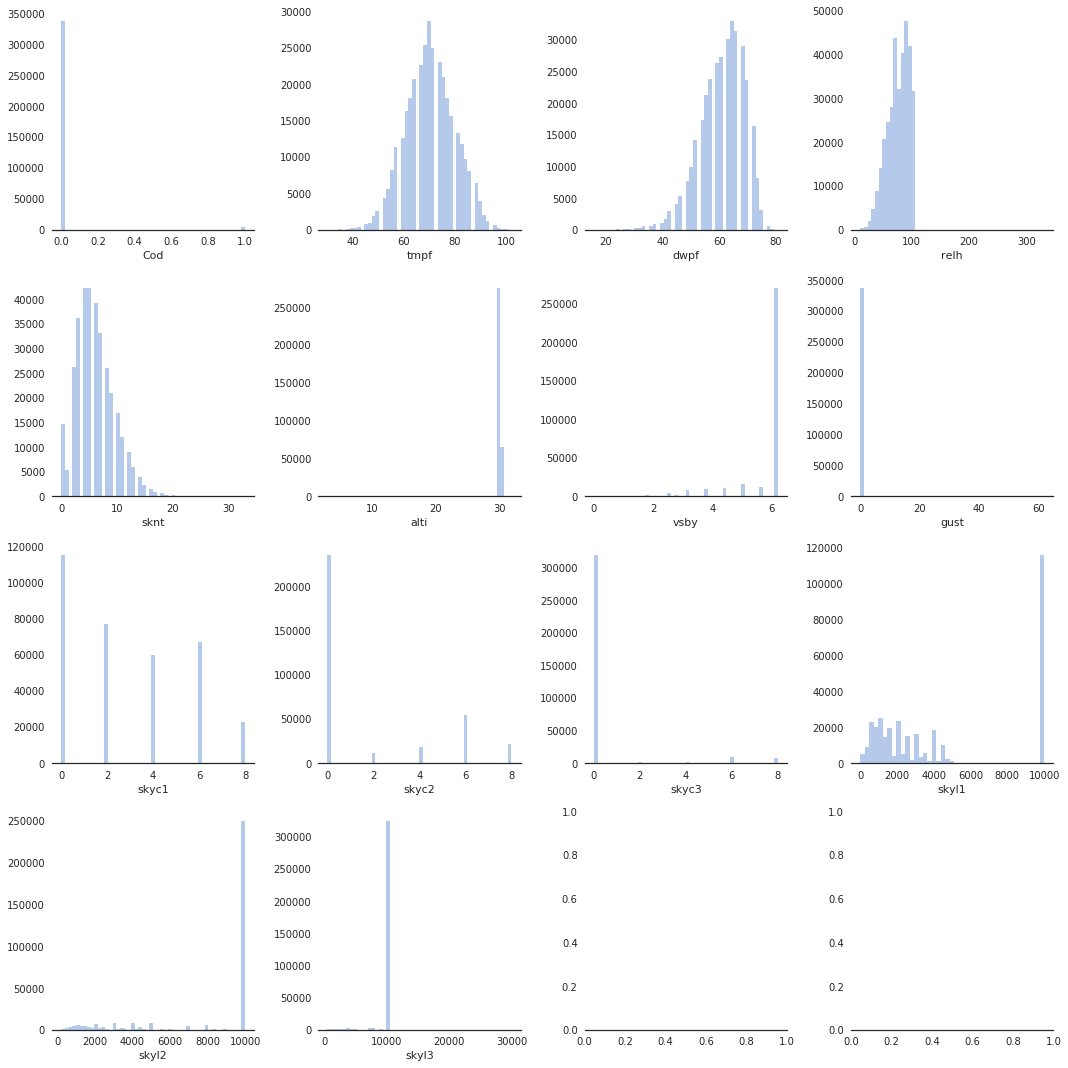

In [7]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(15,15))
sns.despine(left=True)

aux_0, aux_1 = 0,0

for i in Data:
    Data[i] = pd.to_numeric(Data[i])
    sns.distplot(Data[i],  kde=False, color="b", ax=axes[aux_0, aux_1])
    if (aux_1 <3):
        aux_1 += 1
    elif (aux_1 ==3):
        aux_0 += 1
        aux_1 = 0
    plt.tight_layout()
f.savefig("imagens/distplots.png")

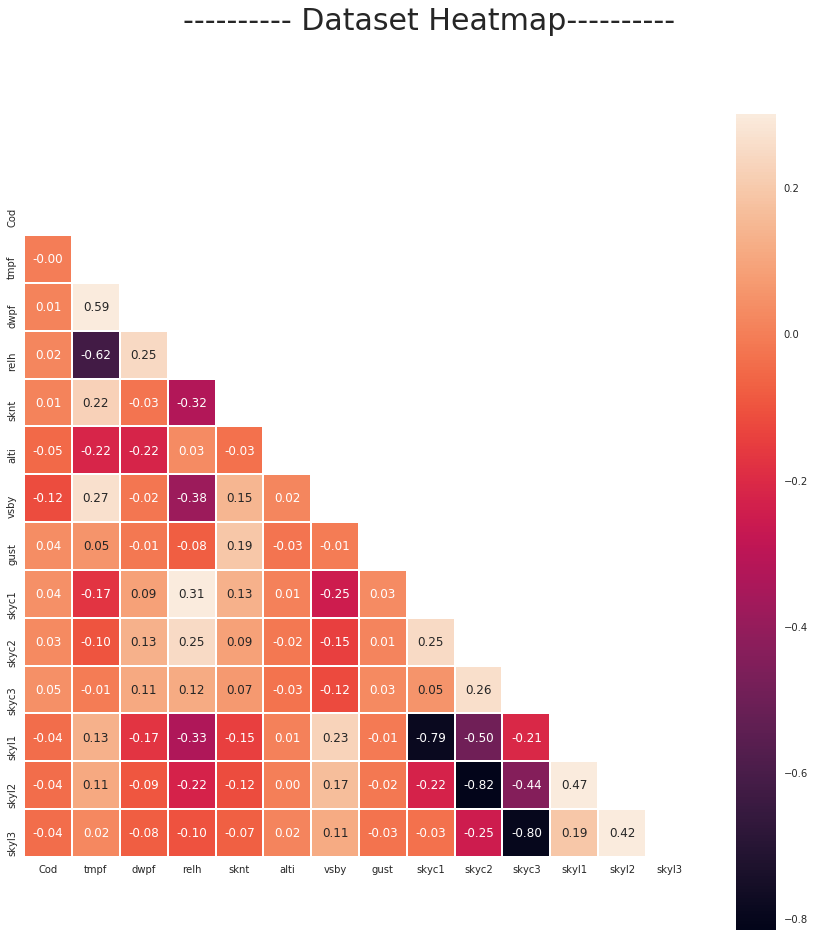

In [8]:
heatmap(Data,"---------- Dataset Heatmap----------")

In [9]:


target = Data["Cod"] #Sem considerar minutos voo ou seria de regressao
features_data = Data.drop(["Cod"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_data, 
                                                    target, 
                                                    test_size = 0.1, 
                                                    random_state = 200)


print(X_test.shape[0])

34095


## Normalizing data and over and undersampling to treat imbalanced data

In [10]:



scaler = preprocessing.StandardScaler()

transformer = RandomUnderSampler(random_state=200)
#transformer2 = SMOTE(random_state=100, n_jobs=-1)
#transformer3 = SMOTEENN(random_state=200, n_jobs=-1)

X_t = scaler.fit_transform(X_train)
#scorer = 'f1_weighted'
scorer = 'f1'
print("Transforming...")


# For KNN
X_undersampled, y_undersampled = transformer.fit_sample(X_t,y_train.values.ravel())

#y_test = pd.get_dummies(y_test)
#y_undersampled = pd.get_dummies(y_undersampled) 
#target = pd.get_dummies(target)
#display(target.head())
    

#X_oversampled, y_oversampled = transformer2.fit_sample(X_t,y_train.values.ravel())
#print("Transformed! Smote")
#X_oversampled2, y_oversampled2 = transformer3.fit_sample(X_t,y_train.values.ravel())

#print("Transformed! SmoteNN")

/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Transforming...


## Benchmark

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')
Training time:  0.5007
------- BENCHMARK: -------


250624    0
52857     0
197247    0
148503    0
233314    0
334024    0
283919    0
Name: Cod, dtype: int64

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1


Confusion matrix: 
True positives:  358
False positives:  32728
Confusion matrix, without normalization
[[  995 32728]
 [   14   358]]


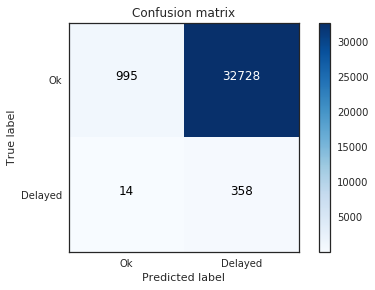

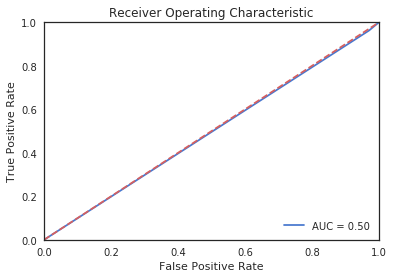

Recall:  0.9623655913978495
Precision:  0.010820286526023092
F1Score:  0.021399964134138322
Accuracy:  0.03968323801143863
AUC:  0.49593533847388543
------------------------------------------------


In [11]:
start = time()
clf = DecisionTreeClassifier()
parameters = {"random_state": [200]}
X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
estimator = (clf)

grid_obj = GridSearchCV(estimator, parameters,cv=10,scoring=scorer, return_train_score =True)
grid_fit = grid_obj.fit(X_aux, y_aux.values.ravel())

end = time()
trainTime = end - start
best_clf = grid_fit.best_estimator_
print(best_clf)
print ("Training time:  {:.4f}".format(trainTime))
    
best_predictions = pd.DataFrame(best_clf.predict(X_test))

print ("------- BENCHMARK: -------")
 #print ("Testing time:  {:.4f}".format(myMulti.testTime))
display(y_test.head(7))
display(best_predictions.head(7))

###
best_score = best_clf.predict_proba(X_test)
best_score = best_score[:,1]

showScores(y_test, best_score, best_predictions.iloc[:,0], 0)

###
#print ("AUC Score: ", multiclass_roc_auc_score(y_test, best_predictions.iloc[:,0]))
    
    ##

print ("------------------------------------------------")

## My investigation

1. Using Random Forest, KNN and Adaboost
2. Tuning their parameters and use grid search to optimize the model
3. Check their results with ShowScores

Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)
Training time:  78.3802
------- Classificador 1: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
True positives:  0
False positives:  0
Confusion matrix, without normalization
[[33723     0]
 [  372     0]]


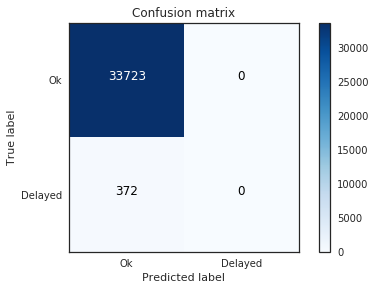

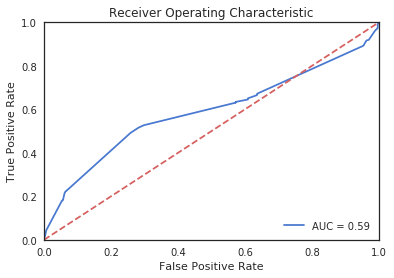

Recall:  0.0
Precision:  0.0
F1Score:  0.0
Accuracy:  0.9890893092828861
AUC:  0.5890084827718806
------------------------------------------------
Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)


/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=500, random_state=200)
Training time:  546.1098
------- Classificador 2: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
True positives:  0
False positives:  0
Confusion matrix, without normalization
[[33723     0]
 [  372     0]]


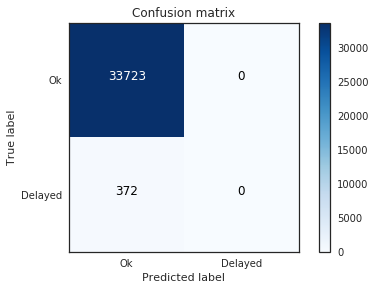

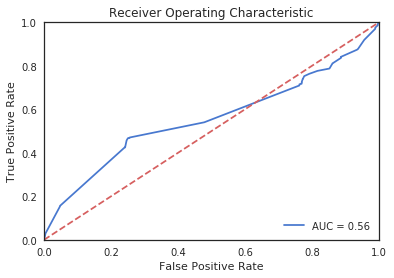

Recall:  0.0
Precision:  0.0
F1Score:  0.0
Accuracy:  0.9890893092828861
AUC:  0.5562313650203317
------------------------------------------------
Samples of delayed or canceled flights
(3609, 1)
Actual data shape: 
(7218, 13) (7218, 1)


/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pgdock/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
Training time:  132.9954
------- Classificador 3: -------


0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Cod, dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Confusion matrix: 
True positives:  45
False positives:  3909
Confusion matrix, without normalization
[[29814  3909]
 [  327    45]]


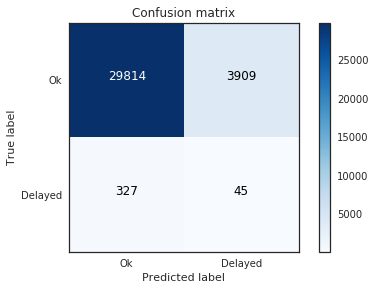

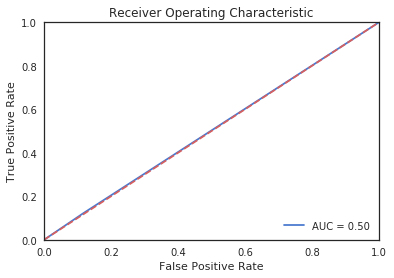

Recall:  0.12096774193548387
Precision:  0.011380880121396054
F1Score:  0.020804438280166437
Accuracy:  0.8757589089309283
AUC:  0.5025263938749567
------------------------------------------------


In [12]:
for i in range(1,4):
    choice = i
    if (choice == 1):
        start = time()
        clf = RandomForestClassifier()
        parameters = {"random_state": [200], "n_estimators": [100,500,900], "n_jobs":[-1]}
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
    
    elif(choice ==2):
        start = time()
        clf = AdaBoostClassifier()
        parameters = {"random_state": [200], "base_estimator": [DecisionTreeClassifier(max_depth=8)], "n_estimators": [100,500,900], "learning_rate":[1,2]}
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)
    
    elif(choice ==3):
        start = time()
        clf = KNeighborsClassifier()
        parameters = {'n_neighbors':list(range(1,15))}               
        X_aux, y_aux = pd.DataFrame(X_undersampled), pd.DataFrame(y_undersampled)

    estimator = (clf)
    
    print ("Samples of delayed or canceled flights")
    print ((y_aux[y_aux.iloc[:, 0]==1]).shape)
    print("Actual data shape: ")
    print (X_aux.shape, y_aux.shape)
          
    grid_obj = GridSearchCV(estimator, parameters,cv=10,scoring=scorer, return_train_score =True)
    grid_fit = grid_obj.fit(X_aux, y_aux.values.ravel())
    

    end = time()
    trainTime = end - start
    best_clf = grid_fit.best_estimator_
    print(best_clf)
    print ("Training time:  {:.4f}".format(trainTime))
    
    best_predictions = pd.DataFrame(best_clf.predict(X_test))
    y_test.reset_index(drop=True, inplace=True)

    print ("------- Classificador %d: -------" %i)
    #print ("Testing time:  {:.4f}".format(myMulti.testTime))
    display(y_test.head(7))
    display(best_predictions.head(7))

    
    ###
    best_score = best_clf.predict_proba(X_test)
    best_score = best_score[:,1]
    
    
    showScores(y_test, best_score, best_predictions.iloc[:,0], i)
    ###
    #print ("AUC Score: ", multiclass_roc_auc_score(y_test, best_predictions.iloc[:,0]))
    ##
    #print("FbetaScore: ", fbeta_score(y_test,best_predictions.iloc[:,0],beta=0.5, average="weighted"))
    print ("------------------------------------------------")
    #classificationReport